# Feature Selection Demo

### Variance Threshold
- [Removing features with low variance](https://scikit-learn.org/stable/modules/feature_selection.html#removing-features-with-low-variance)
- [VarianceThreshold](scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)

In [1]:
from sklearn.feature_selection import VarianceThreshold

In [2]:
X = [[0, 0, 1],
     [0, 1, 0],
     [1, 0, 0],
     [0, 1, 1],
     [0, 1, 0],
     [0, 1, 1]]

In [3]:
threshold = 0.8 * (1 - 0.8)
print(f'threshold = {threshold:.4f}')

sel = VarianceThreshold(threshold)

sel.fit_transform(X)

threshold = 0.1600


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

### Chi2

In [4]:
import pandas as pd

df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
crosstab = pd.crosstab(df['Survived'], df['Sex'])
crosstab

Sex,female,male
Survived,,
0,81,468
1,233,109


In [6]:
pd.crosstab(df['Survived'], df['Sex'], normalize=True).round(4)*100

Sex,female,male
Survived,,
0,9.09,52.53
1,26.15,12.23


In [7]:
from scipy.stats import chi2_contingency
chi2_res = chi2_contingency(crosstab, correction=False)
chi2_res

Chi2ContingencyResult(statistic=263.05057407065567, pvalue=3.7117477701134244e-59, dof=1, expected_freq=array([[193.47474747, 355.52525253],
       [120.52525253, 221.47474747]]))

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex_bin'] = le.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
from sklearn.feature_selection import chi2, SelectKBest

res_chi2 = chi2(df[['Pclass', 'Sex_bin', 'SibSp', 'Parch']], df['Survived'])
res_chi2

(array([30.87369944, 92.70244698,  2.58186538, 10.09749911]),
 array([2.75378563e-08, 6.07783826e-22, 1.08094210e-01, 1.48470676e-03]))

In [10]:
select = SelectKBest(chi2, k=3)
X = select.fit_transform(df[['Pclass', 'Sex_bin', 'SibSp', 'Parch']], df['Survived'])

In [11]:
select.feature_names_in_

array(['Pclass', 'Sex_bin', 'SibSp', 'Parch'], dtype=object)

In [12]:
select.get_feature_names_out()

array(['Pclass', 'Sex_bin', 'Parch'], dtype=object)

In [13]:
select.scores_

array([30.87369944, 92.70244698,  2.58186538, 10.09749911])

In [20]:
select.pvalues_

array([2.53704739e-25, 1.40606613e-69, 2.92243929e-01, 1.47992454e-02])

### Пример, когда средние отличаются

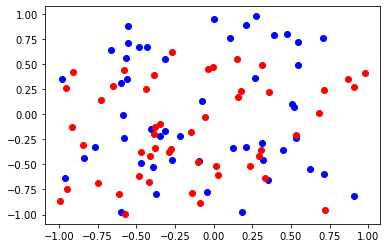

mean y_blue = 0.0210
mean y_red =  -0.1580
difference =  0.1790


In [31]:
import matplotlib.pyplot as plt
import numpy as np

size = 100
sample_size = int(size / 2)

x = np.random.uniform(-1, 1, size=size)
y = np.random.uniform(-1, 1, size=size)

x_blue = x[:sample_size]
y_blue = y[:sample_size]

x_red = x[sample_size:]
y_red = y[sample_size:]

plt.scatter(x_blue, y_blue, color="blue")
plt.scatter(x_red, y_red, color="red")

plt.show()

print(f'mean y_blue = {np.mean(y_blue):.4f}')
print(f'mean y_red =  {np.mean(y_red):.4f}')
print(f'difference =  {abs(np.mean(y_blue) - np.mean(y_red)):.4f}')

In [39]:
size = 100
sample_size = int(size / 2)
n_experiments = 1000000

diff_sum = 0

for i in range(n_experiments):
    x = np.random.uniform(-1, 1, size=size)
    y = np.random.uniform(-1, 1, size=size)

    x_blue = x[:sample_size]
    y_blue = y[:sample_size]

    x_red = x[sample_size:]
    y_red = y[sample_size:]
    
    difference = np.mean(y_blue) - np.mean(y_red)
    
    diff_sum += difference

print(f'For {n_experiments} experiments, average difference = {diff_sum / n_experiments}')

For 1000000 experiments, average difference = 3.678102345727132e-05


### ANOVA F-test

In [14]:
X = [[10, 7],
     [12, 9],
     [15, 12],
     [19, 14],
     [25, 18],
     [27, 19]]

y = [0, 0, 0, 1, 1, 1]

In [15]:
from sklearn.feature_selection import f_classif

res_f_classif = f_classif(X, y)
res_f_classif

(array([16.281725, 13.225033], dtype=float32),
 array([0.01566782, 0.02203034], dtype=float32))

In [16]:
select = SelectKBest(f_classif, k=3)
X = select.fit_transform(df[['Pclass', 'Sex_bin', 'SibSp', 'Parch']], df['Survived'])

In [17]:
select.feature_names_in_

array(['Pclass', 'Sex_bin', 'SibSp', 'Parch'], dtype=object)

In [18]:
select.get_feature_names_out()

array(['Pclass', 'Sex_bin', 'Parch'], dtype=object)

In [19]:
select.scores_

array([115.03127219, 372.4057236 ,   1.1105722 ,   5.96346384])

In [20]:
select.pvalues_

array([2.53704739e-25, 1.40606613e-69, 2.92243929e-01, 1.47992454e-02])